<h1><center>Airbnb A/B Testing</center></h1>

## 1. Data Preparation

### 1.1 Import Libraries
<b>Data Analysis</b>
<ul>
    <li>numpy</li>
    <li>pandas</li>
    <li>matplotlib</li>
    <li>seaborn</li>
</ul>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid', font_scale=1.5)

### 1.2 Load & Check Data

#### Check the assignment data

In [2]:
df_a = pd.read_csv('assignments.csv')
df_a.head()

,id_user,ab
0,f966752c-8533-48b2-af6f-8c6797d2b247,treatment
1,873f93fb-234c-4cfb-83c7-27ff0e582a8e,treatment
2,7308791e-04c3-416a-be2d-4188816decc2,control
3,097c48a4-f4b6-4870-bf29-370e33de868e,control
4,6ff7a902-541b-4eee-ace4-673262b95a94,control


#### Check data type, categorical variables, null values

In [3]:
df_a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   id_user  10000 non-null  object
 1   ab       10000 non-null  object
dtypes: object(2)
memory usage: 156.4+ KB


There are no null values in this dataset.

In [4]:
df_a.describe(include='all').T

,count,unique,top,freq
id_user,10000,9094,ae290fb1-f0ce-4589-908c-d74525f0bc78,7
ab,10000,2,control,5007


The ab column, which represents ab testing group, only has 2 values and is a categorical variable.<br>
However, there are only 9094 unique user ids where as there are 10000 entries. There are possibly duplicates in the dataset.<br>
Remove the duplicates in the data first.

In [5]:
df_a.ab.value_counts()

control      5007
treatment    4993
Name: ab, dtype: int64

The values of the ab column are control and treatment.

#### Check for duplicated entries

In [6]:
df_a[df_a.duplicated(keep='first')]

,id_user,ab
18,ee0a90f6-e3f5-4b54-8c44-50dcded92f08,treatment
34,e60f8fbe-3194-48cb-a2ab-e197d00f71aa,treatment
264,36be1254-70e1-4433-89af-6bf0fa0d12ec,treatment
325,9780488f-efc6-4b00-ab3c-bb7f2b8281c7,control
354,3d7a1148-04c3-45a1-ac2a-763f34314ebe,treatment
...,...,...
9953,c13e0d8d-6a30-41b2-aa80-21b3d1d5f403,control
9965,5d1b2728-3992-4cca-85d7-f0e25d174124,treatment
9968,2b0c2a3c-99af-44b9-bf7e-b4f94cfb5bff,treatment
9987,ebd6a873-7338-48d0-aa70-54963afe5079,treatment


There are 513 rows of duplicated entries.

In [7]:
df_a = df_a.drop_duplicates(keep='first')

In [8]:
print(df_a.info())
df_a.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9487 entries, 0 to 9999
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   id_user  9487 non-null   object
 1   ab       9487 non-null   object
dtypes: object(2)
memory usage: 222.4+ KB
None


,id_user,ab
count,9487,9487
unique,9094,2
top,1cb723dc-bb1b-4f42-a4f4-48028e31dc9c,treatment
freq,2,4745


There are still 9487 rows of entries, while there are only 9094 unique ids.<br>
It is possible that some user ids are placed in both the control and treatment groups.

In [9]:
df_a_pivot = df_a.pivot_table(index='id_user', aggfunc='count')
df_a_pivot

,ab
id_user,
0000d66b-1872-4605-9244-24d5936e221c,1
0001b13e-421a-47c8-baaa-48d1a740e784,2
000df180-89b7-45c4-a738-15f6962a101d,1
0018de9a-7ef1-4c02-ab10-c85b8d44bcdf,1
001b411e-56cd-4b6d-a6de-92360d6d367e,1
...,...
ffdab471-08db-40cb-a56a-6b30915dab7f,1
ffe15107-dce4-4f79-8fb8-d31f58e5ca4d,1
ffee6c24-244d-428f-884b-edb252e94d48,1


Some ids occur twice in the assignments dataset. If they are not removed by dropping duplicates, they must have different assignments.

In [10]:
df_a_pivot_filter = df_a_pivot.loc[df_a_pivot['ab']==2] # Select the users that have two assignments
dup_id = df_a_pivot_filter.index
df_a_pivot_filter

,ab
id_user,
0001b13e-421a-47c8-baaa-48d1a740e784,2
017d6a7b-5985-4dc7-b1eb-322a6a3dc9e3,2
02c1787a-01ab-490e-af01-934f3d001467,2
03e5ce87-83ab-42fd-96fb-18effa1e1886,2
05359594-c91f-4e9f-afee-18e6ae8866f8,2
...,...
fcdc53d6-7f18-4576-9f5a-5b30b5600a04,2
fdda3717-71b4-4781-b5d1-ad1cc92495a0,2
fe57b8f0-1fac-4cb9-8a67-2959bdedf06c,2


Users simultaneously in both the control and treatment groups will affect the result of AB testing. Since there are only 393 users that are in both groups - which is a small fraction of the total 9094 users - it is safest to remove these users from the data.

In [11]:
df_a_f = df_a.loc[~df_a['id_user'].isin(dup_id)]
df_a_f

,id_user,ab
0,f966752c-8533-48b2-af6f-8c6797d2b247,treatment
1,873f93fb-234c-4cfb-83c7-27ff0e582a8e,treatment
2,7308791e-04c3-416a-be2d-4188816decc2,control
3,097c48a4-f4b6-4870-bf29-370e33de868e,control
5,ff3d6a6a-7748-41f8-8a3f-fdc26ca21650,control
...,...,...
9995,6a72582e-c0c4-4f37-a824-186bde0b3d47,treatment
9996,d838c86d-fdbf-4a36-a57c-2d518c60ce92,treatment
9997,15da69de-49dd-4ba8-97d6-0919fdaf3834,control
9998,e6c5dd5d-5fef-4b16-a7e6-37fa8cee3b43,control


In [12]:
print(df_a_f.info())
df_a_f.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8701 entries, 0 to 9999
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   id_user  8701 non-null   object
 1   ab       8701 non-null   object
dtypes: object(2)
memory usage: 203.9+ KB
None


,id_user,ab
count,8701,8701
unique,8701,2
top,6e5092b9-0807-4453-baa2-9c35c37fca15,treatment
freq,1,4352


In [13]:
df_a_f['ab'].value_counts()

treatment    4352
control      4349
Name: ab, dtype: int64

The number of users in the treatment and control groups are about the same.

#### Check the contact data

In [14]:
df_c = pd.read_csv('contacts.csv')
df_c.head()

,id_guest,id_host,id_listing,ts_interaction_first,ts_reply_at_first,ts_accepted_at_first,ts_booking_at,dim_contact_channel,m_first_message_length
0,f966752c-8533-48b2-af6f-8c6797d2b247,4405ab66-1c68-449b-abd9-1ad1892a6c4d,fe07e0c4-c317-44bc-a82d-5b599a248049,2013-01-01 23:04:35,2013-01-03 23:15:23.0,NaN,NaN,contact_me,230.0
1,873f93fb-234c-4cfb-83c7-27ff0e582a8e,aa41b57b-e29f-4c95-bf27-48f27519e419,d47717da-315a-42c2-8888-9b7d4bea8829,2013-01-02 00:21:26,2013-01-07 23:38:31.0,NaN,NaN,contact_me,98.0
2,7308791e-04c3-416a-be2d-4188816decc2,8b118ba1-b439-493e-88c7-2c89a81cec1b,ac231804-951c-4fcb-a0e6-1a4aecbfb6ce,2013-01-02 02:30:19,2013-01-02 18:06:10.0,2013-01-02 18:06:10.0,NaN,contact_me,278.0
3,097c48a4-f4b6-4870-bf29-370e33de868e,140b0847-549d-4c77-bb8c-7cea16914871,727357bd-8031-4e59-b812-22cfa617e031,2013-01-02 03:24:06,2013-01-02 17:49:08.0,NaN,NaN,contact_me,785.0
4,6ff7a902-541b-4eee-ace4-673262b95a94,3633b49c-9f63-499d-a9b1-f1e686832e7b,97c8c06a-0b01-45d1-b9b4-5771aa919f67,2013-01-02 07:11:43,2013-01-02 08:56:39.0,2013-01-02 08:56:39.0,NaN,contact_me,69.0


#### Check data type, categorical variables, null values

In [15]:
df_c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id_guest                10000 non-null  object 
 1   id_host                 10000 non-null  object 
 2   id_listing              10000 non-null  object 
 3   ts_interaction_first    10000 non-null  object 
 4   ts_reply_at_first       8571 non-null   object 
 5   ts_accepted_at_first    3363 non-null   object 
 6   ts_booking_at           2171 non-null   object 
 7   dim_contact_channel     10000 non-null  object 
 8   m_first_message_length  9883 non-null   float64
dtypes: float64(1), object(8)
memory usage: 703.2+ KB


The columns ts_reply_at_first, ts_accepted_at_first, ts_booking_at, and m_first_message_length all have null values.<br>
This shows that in some cases, the host does not reply or accept the request, and in most cases the guest does not book the room successfully.<br>
In a few cases, the guest does not send any message to the host.

In [16]:
date_cols = ['ts_interaction_first', 'ts_reply_at_first', 'ts_accepted_at_first', 'ts_booking_at']
for col in date_cols:
    df_c[col] = df_c[col].astype('datetime64')

Change the columns that contain datetime values into datetime.

In [17]:
df_c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   id_guest                10000 non-null  object        
 1   id_host                 10000 non-null  object        
 2   id_listing              10000 non-null  object        
 3   ts_interaction_first    10000 non-null  datetime64[ns]
 4   ts_reply_at_first       8571 non-null   datetime64[ns]
 5   ts_accepted_at_first    3363 non-null   datetime64[ns]
 6   ts_booking_at           2171 non-null   datetime64[ns]
 7   dim_contact_channel     10000 non-null  object        
 8   m_first_message_length  9883 non-null   float64       
dtypes: datetime64[ns](4), float64(1), object(4)
memory usage: 703.2+ KB


In [18]:
df_c.describe(include='all').T

,count,unique,top,freq,first,last,mean,std,min,25%,50%,75%,max
id_guest,10000,9094,ae290fb1-f0ce-4589-908c-d74525f0bc78,7,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
id_host,10000,3669,589ba78b-cd36-4232-9cdd-e39f0acf08f2,66,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
id_listing,10000,4449,3a5681ef-1121-4f0b-a498-00efe43a9b5e,32,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ts_interaction_first,10000,9972,2013-04-01 15:03:59,3,2013-01-01 06:11:20,2013-12-31 23:24:15,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ts_reply_at_first,8571,8568,2013-09-19 23:55:51,2,2013-01-01 18:27:53,2014-10-20 21:20:25,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ts_accepted_at_first,3363,3362,2013-03-13 06:00:00,2,2013-01-01 18:27:53,2015-01-15 23:47:36,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ts_booking_at,2171,2170,2013-03-13 06:00:00,2,2013-01-01 23:40:16,2015-01-15 23:47:36,NaN,NaN,NaN,NaN,NaN,NaN,NaN
dim_contact_channel,10000,3,contact_me,8130,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
m_first_message_length,9883,NaN,NaN,NaN,NaT,NaT,324.459,233.561,0,167,272,420,3182


The contacts data also have 9094 unique user ids.<br>
The dim_contact_channel is a categorical variable.<br>
The shortest message has 0 characters. For now, treat this as not sending any message.

In [19]:
df_c['dim_contact_channel'].value_counts()

contact_me        8130
book_it           1826
instant_booked      44
Name: dim_contact_channel, dtype: int64

The majority of contacts occurred via a contact.

#### Check for duplicated entries

In [20]:
df_c = df_c.drop_duplicates(keep='first')
df_c.describe(include='all').T

,count,unique,top,freq,first,last,mean,std,min,25%,50%,75%,max
id_guest,10000,9094,ae290fb1-f0ce-4589-908c-d74525f0bc78,7,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
id_host,10000,3669,589ba78b-cd36-4232-9cdd-e39f0acf08f2,66,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
id_listing,10000,4449,3a5681ef-1121-4f0b-a498-00efe43a9b5e,32,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ts_interaction_first,10000,9972,2013-04-01 15:03:59,3,2013-01-01 06:11:20,2013-12-31 23:24:15,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ts_reply_at_first,8571,8568,2013-09-19 23:55:51,2,2013-01-01 18:27:53,2014-10-20 21:20:25,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ts_accepted_at_first,3363,3362,2013-03-13 06:00:00,2,2013-01-01 18:27:53,2015-01-15 23:47:36,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ts_booking_at,2171,2170,2013-03-13 06:00:00,2,2013-01-01 23:40:16,2015-01-15 23:47:36,NaN,NaN,NaN,NaN,NaN,NaN,NaN
dim_contact_channel,10000,3,contact_me,8130,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
m_first_message_length,9883,NaN,NaN,NaN,NaT,NaT,324.459,233.561,0,167,272,420,3182


There are no duplicate rows in the contact data.

In [21]:
df_c_f = pd.merge(left = df_a_f, right = df_c,
         left_on = 'id_user', right_on = 'id_guest', how='left')
df_c_f.head()

,id_user,ab,id_guest,id_host,id_listing,ts_interaction_first,ts_reply_at_first,ts_accepted_at_first,ts_booking_at,dim_contact_channel,m_first_message_length
0,f966752c-8533-48b2-af6f-8c6797d2b247,treatment,f966752c-8533-48b2-af6f-8c6797d2b247,4405ab66-1c68-449b-abd9-1ad1892a6c4d,fe07e0c4-c317-44bc-a82d-5b599a248049,2013-01-01 23:04:35,2013-01-03 23:15:23,NaT,NaT,contact_me,230.0
1,873f93fb-234c-4cfb-83c7-27ff0e582a8e,treatment,873f93fb-234c-4cfb-83c7-27ff0e582a8e,aa41b57b-e29f-4c95-bf27-48f27519e419,d47717da-315a-42c2-8888-9b7d4bea8829,2013-01-02 00:21:26,2013-01-07 23:38:31,NaT,NaT,contact_me,98.0
2,7308791e-04c3-416a-be2d-4188816decc2,control,7308791e-04c3-416a-be2d-4188816decc2,8b118ba1-b439-493e-88c7-2c89a81cec1b,ac231804-951c-4fcb-a0e6-1a4aecbfb6ce,2013-01-02 02:30:19,2013-01-02 18:06:10,2013-01-02 18:06:10,NaT,contact_me,278.0
3,097c48a4-f4b6-4870-bf29-370e33de868e,control,097c48a4-f4b6-4870-bf29-370e33de868e,140b0847-549d-4c77-bb8c-7cea16914871,727357bd-8031-4e59-b812-22cfa617e031,2013-01-02 03:24:06,2013-01-02 17:49:08,NaT,NaT,contact_me,785.0
4,ff3d6a6a-7748-41f8-8a3f-fdc26ca21650,control,ff3d6a6a-7748-41f8-8a3f-fdc26ca21650,82bc1dd7-e146-4c03-93ef-1edd143e4612,aed82e29-205e-4827-a7ac-c5963c8a6895,2013-01-02 13:29:21,2013-01-22 20:19:54,NaT,NaT,contact_me,623.0


Select only the rows where the user is in the filtered assignment dataset.

In [22]:
df_c_f['dim_contact_channel'].value_counts()

contact_me        7290
book_it           1770
instant_booked      44
Name: dim_contact_channel, dtype: int64

#### Check the duration of the experiment

In [23]:
for col in date_cols:
    print(col + ': Min Date: ' + str(df_c_f[col].min()) + '; Max Date: ' + str(df_c_f[col].max()))
    print(col + ' Range: ' + str(df_c_f[col].max() - df_c_f[col].min()))
    print()

ts_interaction_first: Min Date: 2013-01-01 06:11:20; Max Date: 2013-12-31 23:24:15
ts_interaction_first Range: 364 days 17:12:55

ts_reply_at_first: Min Date: 2013-01-01 18:27:53; Max Date: 2014-10-20 21:20:25
ts_reply_at_first Range: 657 days 02:52:32

ts_accepted_at_first: Min Date: 2013-01-01 18:27:53; Max Date: 2015-01-15 23:47:36
ts_accepted_at_first Range: 744 days 05:19:43

ts_booking_at: Min Date: 2013-01-01 23:40:16; Max Date: 2015-01-15 23:47:36
ts_booking_at Range: 744 days 00:07:20



The first interaction's range is around a year.

''

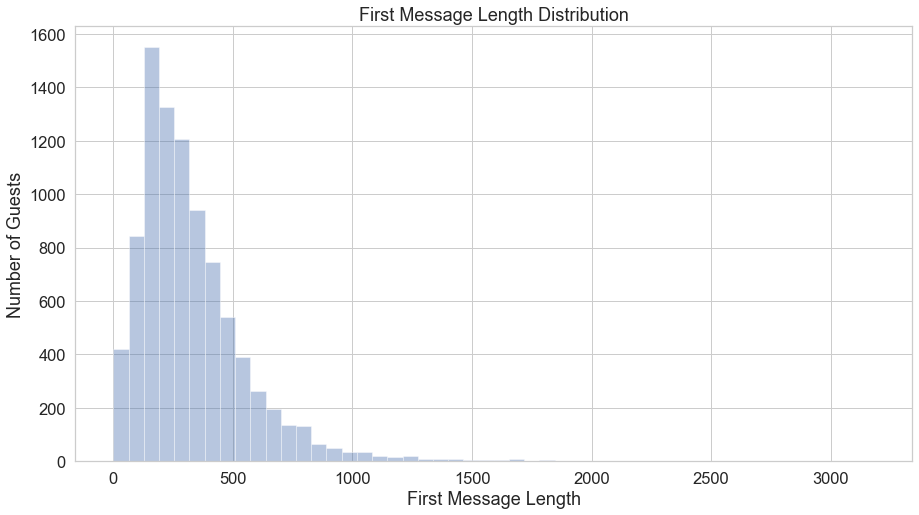

In [29]:
fig, ax = plt.subplots(1, 1, figsize=(15, 8))
sns.distplot(df_c_f['m_first_message_length'], kde=False)
ax.set_title('First Message Length Distribution')
ax.set_xlabel('First Message Length')
ax.set_ylabel('Number of Guests')
;

''

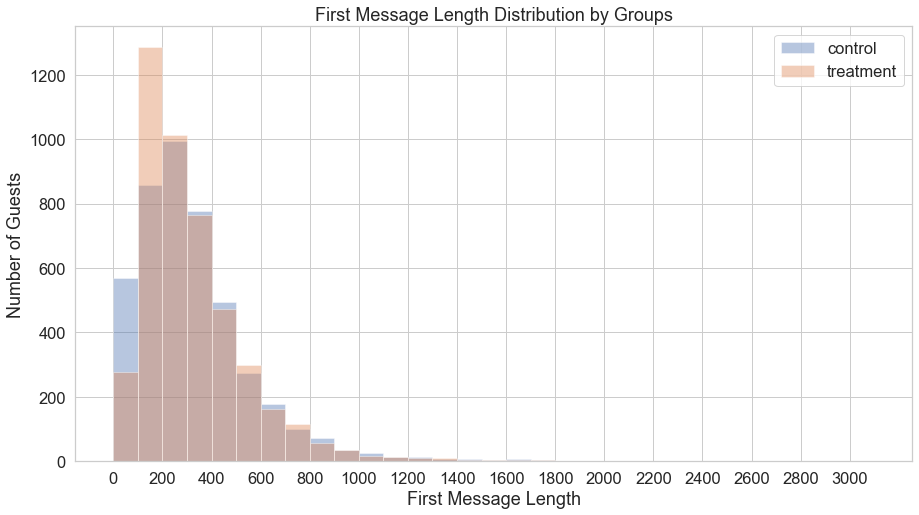

In [30]:
fig, ax = plt.subplots(1, 1, figsize=(15, 8))
sns.distplot(df_c_f.loc[df_c_f['ab']=='control', 'm_first_message_length'],
             bins = range(0, 3200, 100), label='control', kde=False)
sns.distplot(df_c_f.loc[df_c_f['ab']=='treatment', 'm_first_message_length'],
             bins = range(0, 3200, 100), label='treatment', kde=False)
ax.set_title('First Message Length Distribution by Groups')
ax.set_xticks(range(0, 3200, 200))
ax.set_xlabel('First Message Length')
ax.set_ylabel('Number of Guests')
ax.legend()
;

''

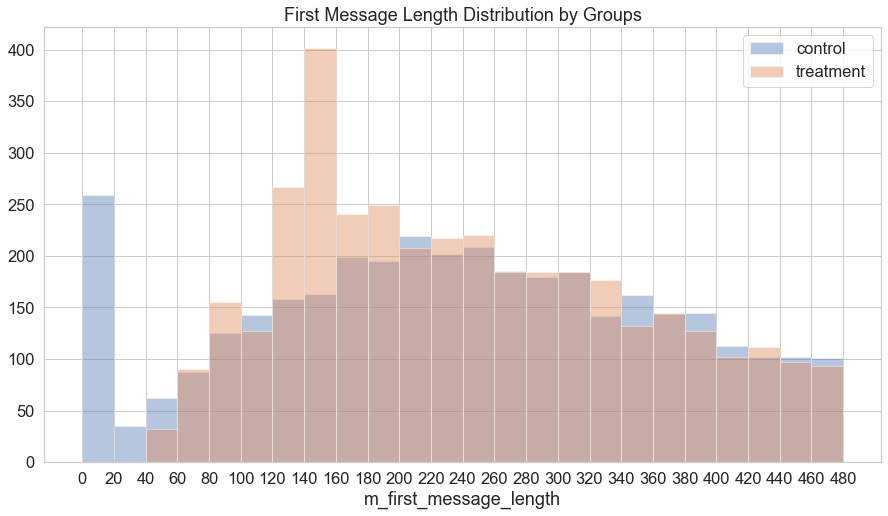

In [26]:
fig, ax = plt.subplots(1, 1, figsize=(15, 8))
sns.distplot(df_c_f.loc[df_c_f['ab']=='control', 'm_first_message_length'],
             bins = range(0, 500, 20), label='control', kde=False)
sns.distplot(df_c_f.loc[df_c_f['ab']=='treatment', 'm_first_message_length'],
             bins = range(0, 500, 20), label='treatment', kde=False)
ax.set_title('First Message Length Distribution by Groups')
ax.set_xticks(range(0, 500, 20))
ax.legend()
;

The treatment group has a higher message distribution of messages with length between 120 and 200 characters, possibly because of the least character limitation.

In [32]:
df_c_f.pivot_table(index='ab', values='m_first_message_length', aggfunc=['min','max','median', 'mean','std'])

,min,max,median,mean,std
,m_first_message_length,m_first_message_length,m_first_message_length,m_first_message_length,m_first_message_length
ab,,,,,
control,0.0,2654.0,277.0,322.814781,240.492930
treatment,51.0,3182.0,268.0,322.651296,224.327484


The mean message length of the control and treatment groups are about the same.<br>
Howeer, while the treatment group should have message lengths larger than 140 because o the experiment condition, the minimum message length is 51 characters.

In [33]:
df_c_f.loc[(df_c_f['ab']=='treatment')&
           (df_c_f['m_first_message_length']<140)]

,id_user,ab,id_guest,id_host,id_listing,ts_interaction_first,ts_reply_at_first,ts_accepted_at_first,ts_booking_at,dim_contact_channel,m_first_message_length
1,873f93fb-234c-4cfb-83c7-27ff0e582a8e,treatment,873f93fb-234c-4cfb-83c7-27ff0e582a8e,aa41b57b-e29f-4c95-bf27-48f27519e419,d47717da-315a-42c2-8888-9b7d4bea8829,2013-01-02 00:21:26,2013-01-07 23:38:31,NaT,NaT,contact_me,98.0
16,ee0a90f6-e3f5-4b54-8c44-50dcded92f08,treatment,ee0a90f6-e3f5-4b54-8c44-50dcded92f08,1f69d93b-184f-4937-998d-949fee6639a9,59080b26-29fc-489a-8e34-c030dbea07c4,2013-01-03 21:33:59,2013-01-07 20:58:57,NaT,NaT,contact_me,124.0
110,f80991c8-6de3-4acb-beb5-a1448e36a005,treatment,f80991c8-6de3-4acb-beb5-a1448e36a005,20888cfa-e05d-4067-b24e-2eb83dfddc72,8abb1b00-6a69-467b-8dab-14273f312aa8,2013-01-27 18:19:19,2013-01-29 05:18:28,NaT,NaT,contact_me,106.0
111,765ce916-8856-4f4a-a902-484548fb988a,treatment,765ce916-8856-4f4a-a902-484548fb988a,e513f8f2-63eb-4ca1-b362-4a6a9294c618,b6ed4a87-79f0-4dcf-a4f2-fc85dd34a497,2013-01-27 19:47:07,2013-01-27 19:47:22,NaT,NaT,contact_me,92.0
121,93b70d8d-f938-482f-bf03-a4fc70b1926c,treatment,93b70d8d-f938-482f-bf03-a4fc70b1926c,1ad3c066-076c-4c8c-8b84-5090ce344079,d82a3c32-cec6-4dde-9004-59a4495c2f7a,2013-01-28 17:28:49,2013-01-29 06:37:31,2013-01-30 04:29:39,2013-01-30 04:29:39,contact_me,98.0
...,...,...,...,...,...,...,...,...,...,...,...
9076,21c968a1-a985-498e-bb73-10d0a9f96b58,treatment,21c968a1-a985-498e-bb73-10d0a9f96b58,1286a0b6-9d24-433e-94c9-ba14a604d4a8,ac127cb5-4e58-40c9-b0f0-264d09e7733d,2013-06-02 17:11:09,2013-06-05 15:05:17,NaT,NaT,contact_me,129.0
9089,af819a00-5edb-4881-876d-2988cc3058d5,treatment,af819a00-5edb-4881-876d-2988cc3058d5,573dc809-cab0-4b1a-b3ba-80d56179f54d,2b919b40-a7ac-4deb-8c63-721c9a713d13,2013-06-05 00:21:04,2013-06-05 01:34:36,2013-06-05 01:34:36,NaT,contact_me,55.0
9090,dc78b598-2475-4e57-b53b-909133987f74,treatment,dc78b598-2475-4e57-b53b-909133987f74,5fce2454-63d8-4917-8332-74488b54d540,c1331d40-47b9-4e8b-b491-204b827f5d01,2013-06-05 06:08:38,2013-06-05 14:55:01,NaT,NaT,contact_me,117.0
9093,effb59b1-f3ab-44d8-876e-396c32a0fefa,treatment,effb59b1-f3ab-44d8-876e-396c32a0fefa,d2202c5c-486a-45e1-992f-e6924c2d5542,b3933cdc-9487-44a0-a175-de0295601d3d,2013-06-05 15:50:46,2013-06-05 15:50:24,NaT,NaT,contact_me,117.0


There are 671 bookings in the treatment group in which the user's first message is less than 140 characters.<br>
This possibly occurred because the description of the restriction (messages should have at least 140 characters) is not clear enough.<br>
Removing these 671 bookings will cause the number of users in the treatment group to be significantly less than the number of users in the control group. For now, leave thes users in the treatment group.

## 2. Analysis

### 2.1 Define metrics

Since the goal of the experiment is to help the guests maximize their chances of being accepted by the host, the most reasonable metrics would be the acceptance rate instead of the booking rate.<br>
Acceptance rate = # of bookings accepted / # of bookings made

#### Evaluation metrics: Z score

In [35]:
#define function for two-proportion z test
#reference: https://www.statisticshowto.com/z-test/

def z_test(t_size, c_size, t_tot, c_tot):
    t_rate = t_size/t_tot
    c_rate = c_size/c_tot
    
    p = (t_size+c_size)/(t_tot+c_tot)
    
    if p!=1:
        z_score = (t_rate-c_rate) / np.sqrt(p*(1-p)*(1/t_tot+1/c_tot))
    else:
        z_score = 0
    return z_score

### 2.2 Calculate Acceptance Rate

In [36]:
dates_group = df_c_f.pivot_table(index='ab', values=date_cols, aggfunc='count')
dates_group = dates_group[date_cols]
dates_group

,ts_interaction_first,ts_reply_at_first,ts_accepted_at_first,ts_booking_at
ab,,,,
control,4550,3906,1595,1039
treatment,4554,3935,1561,1038


In [37]:
c_tot = dates_group.loc['control', 'ts_interaction_first']
c_size = dates_group.loc['control', 'ts_accepted_at_first']
print('Accpetance rate of control group: ' + str(c_size/c_tot))

t_tot = dates_group.loc['treatment', 'ts_interaction_first']
t_size = dates_group.loc['treatment', 'ts_accepted_at_first']
print('Accpetance rate of treatment group: ' + str(t_size/t_tot))

Accpetance rate of control group: 0.3505494505494505
Accpetance rate of treatment group: 0.3427755819060167


In [38]:
z = z_test(t_size, c_size, t_tot, c_tot)
print('The z score is: ' + str(z))

The z score is: -0.779294402482624


Z scoreis well below 1.96. The null hypothesis, that the control group is the same as the treatment group, cannot be rejected.

In [39]:
df_c_f_acc = df_c_f.loc[df_c_f['ts_accepted_at_first'] < df_c_f['ts_interaction_first']]
print(df_c_f_acc.shape)
df_c_f_acc.head()

(105, 11)


,id_user,ab,id_guest,id_host,id_listing,ts_interaction_first,ts_reply_at_first,ts_accepted_at_first,ts_booking_at,dim_contact_channel,m_first_message_length
176,30abce0e-e105-41b0-b31a-0673efa0cd26,treatment,30abce0e-e105-41b0-b31a-0673efa0cd26,a8b671c7-4bdf-4896-b42f-2ba1b1a93adf,6e59bc7e-8084-4ff4-a1b2-21399a6b8829,2013-02-11 09:51:06,2013-02-11 09:49:27,2013-02-11 09:49:27,2013-02-11 09:49:27,instant_booked,391.0
309,0de89a34-2978-4bbf-b60a-f6607affa804,treatment,0de89a34-2978-4bbf-b60a-f6607affa804,f50d600e-b995-4313-aa7b-a5ac605bf5e0,5051a4f0-d301-48f3-81fc-093c8550570b,2013-03-08 05:36:44,2013-03-08 05:36:33,2013-03-08 05:36:33,2013-03-08 05:36:33,book_it,277.0
456,756b7b3b-02bd-4b12-ab3c-030bab2097ef,control,756b7b3b-02bd-4b12-ab3c-030bab2097ef,4a284860-eb40-48cd-b5b5-b27c7b98a321,cd2f1faf-a222-4c1d-bbf0-4c1988d9565b,2013-03-28 01:30:28,2013-03-28 01:28:49,2013-03-28 01:28:49,2013-03-28 01:28:49,book_it,69.0
484,8c5bedad-e5e9-4a2e-9da5-98f9e187c4b6,treatment,8c5bedad-e5e9-4a2e-9da5-98f9e187c4b6,c74ba46f-6e65-4be9-b5b5-8b582e5d505e,13d3ac8d-7b30-451c-a3f3-fdcafe3fd3a5,2013-04-01 15:18:49,2013-04-01 15:17:10,2013-04-01 15:17:10,2013-04-01 15:17:10,instant_booked,379.0
590,8c0ecaed-eec2-481f-ae3e-e35304c9e8fe,control,8c0ecaed-eec2-481f-ae3e-e35304c9e8fe,1ae0bb1c-7c7a-49bd-a640-7c4325572e02,d825f2f8-84f5-435b-a61c-642f02c50711,2013-04-12 19:56:51,2013-04-12 19:56:32,2013-04-12 19:56:32,2013-04-13 00:08:12,contact_me,74.0


In some cases, the time the booking is accepted is earlier than the time the first inquiry is made.<br>
There are only 105 cases where this happens, so it might be an error in recording time.

In [40]:
df_c_f_acc['dim_contact_channel'].value_counts()

book_it           42
instant_booked    42
contact_me        21
Name: dim_contact_channel, dtype: int64

This phenomenon happens across all three channels, so it is unlikely the result of guests booking through a particular channel.

In [41]:
df_c_f_ = df_c_f.loc[~(df_c_f['ts_accepted_at_first'] < df_c_f['ts_interaction_first'])]

In [42]:
dates_group_ = df_c_f_.pivot_table(index='ab', values=['id_user']+date_cols, aggfunc='count')
dates_group_ = dates_group_[['id_user']+date_cols]
dates_group_

,id_user,ts_interaction_first,ts_reply_at_first,ts_accepted_at_first,ts_booking_at
ab,,,,,
control,4495,4495,3852,1540,990
treatment,4504,4504,3885,1511,994


In [43]:
c_tot_ = dates_group_.loc['control', 'ts_interaction_first']
c_size_ = dates_group_.loc['control', 'ts_accepted_at_first']
print('Accpetance rate of control group: ' + str(c_size_/c_tot_))

t_tot_ = dates_group_.loc['treatment', 'ts_interaction_first']
t_size_ = dates_group_.loc['treatment', 'ts_accepted_at_first']
print('Accpetance rate of treatment group: ' + str(t_size_/t_tot_))

Accpetance rate of control group: 0.3426028921023359
Accpetance rate of treatment group: 0.3354795737122558


In [44]:
z_ = z_test(t_size_, c_size_, t_tot_, c_tot_)
print('The z score is: {}'.format(z_))

The z score is: -0.7137349069396788


Even after removing the 105 bookings, the z score is well below 1.65. Therefore, the treatment and control groups are not different.

### 2.3 Calculate acceptance rate by booking channel

In [45]:
channel_group = df_c_f.pivot_table(index=['ab','dim_contact_channel'], values=['id_user']+date_cols, aggfunc='count')
channel_group = channel_group[['id_user']+date_cols]
channel_group

id_user  ts_interaction_first  \
ab        dim_contact_channel                                  
control   book_it                  880                   880   
          contact_me              3648                  3648   
          instant_booked            22                    22   
treatment book_it                  890                   890   
          contact_me              3642                  3642   
          instant_booked            22                    22   

                               ts_reply_at_first  ts_accepted_at_first  \
ab        dim_contact_channel                                            
control   book_it                            808                   514   
          contact_me                        3076                  1059   
          instant_booked                      22                    22   
treatment book_it                            809                   497   
          contact_me                        3104                  1042   
          instant_booked                      22                    22   

                               ts_booking_at  
ab        dim_contact_channel                 
control   book_it                        510  
          contact_me                     507  
          instant_booked                  22  
treatment book_it                        492  
          contact_me                     524  
          instant_booked                  22

In [46]:
channels = df_c_f['dim_contact_channel'].unique()

In [47]:
for c in channels:
    c_tot_ = channel_group.loc[('control', c), 'ts_interaction_first']
    c_size_ = channel_group.loc[('control', c), 'ts_accepted_at_first']
    t_tot_ = channel_group.loc[('treatment', c), 'ts_interaction_first']
    t_size_ = channel_group.loc[('treatment', c), 'ts_accepted_at_first']
    z_ = z_test(t_size_, c_size_, t_tot_, c_tot_)
    print('{}: Control group acceptance rate is {}'.format(c, round(c_size_/c_tot_, 2)))
    print('{}: Treatment group acceptance rate is {}'.format(c, round(t_size_/t_tot_, 2)))
    print('The z score for {} channel is: {}'.format(c, z_))

contact_me: Control group acceptance rate is 0.29
contact_me: Treatment group acceptance rate is 0.29
The z score for contact_me channel is: -0.3948847153852381
book_it: Control group acceptance rate is 0.58
book_it: Treatment group acceptance rate is 0.56
The z score for book_it channel is: -1.0908119459992882
instant_booked: Control group acceptance rate is 1.0
instant_booked: Treatment group acceptance rate is 1.0
The z score for instant_booked channel is: 0


The z scores for all channels of contact are well below the significant level.

### 2.4 Compare the number of days between first interaction and acceptance

In [48]:
df_c_f_dur = df_c_f.loc[df_c_f['ts_accepted_at_first'].notnull()]

# Calculate time spent from acceptance to first interaction
df_c_f_dur['duration'] = (df_c_f_dur['ts_accepted_at_first'] - df_c_f_dur['ts_interaction_first'])

# Calculate the number of days from acceptance to first interaction
df_c_f_dur['hours'] = round((df_c_f_dur['duration'].dt.total_seconds() / 3600))
df_c_f_dur['hours'] = df_c_f_dur['hours'].apply(lambda x: 0.0 if x == -0.0 else x)

df_c_f_dur['days'] = round(df_c_f_dur['hours'] / 24)
df_c_f_dur['days'] = df_c_f_dur['days'].apply(lambda x: 0.0 if x == -0.0 else x)

C:\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
C:\anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.p

In [49]:
df_c_f_dur.head()

,id_user,ab,id_guest,id_host,id_listing,ts_interaction_first,ts_reply_at_first,ts_accepted_at_first,ts_booking_at,dim_contact_channel,m_first_message_length,duration,hours,days
2,7308791e-04c3-416a-be2d-4188816decc2,control,7308791e-04c3-416a-be2d-4188816decc2,8b118ba1-b439-493e-88c7-2c89a81cec1b,ac231804-951c-4fcb-a0e6-1a4aecbfb6ce,2013-01-02 02:30:19,2013-01-02 18:06:10,2013-01-02 18:06:10,NaT,contact_me,278.0,15:35:51,16.0,1.0
9,7bd7d2b5-040c-4a72-8bba-7bd8da14cb7f,treatment,7bd7d2b5-040c-4a72-8bba-7bd8da14cb7f,8903a438-9f2d-4b6f-b27f-ca896e0420ca,6a956576-361c-4ba8-99af-6cb0fdcac018,2013-01-02 21:21:33,2013-01-03 18:30:31,2013-01-03 18:32:01,2013-01-03 18:32:01,book_it,205.0,21:10:28,21.0,1.0
10,9e4e506e-29c8-421b-acac-ca6ee984e9a2,treatment,9e4e506e-29c8-421b-acac-ca6ee984e9a2,044ff4a0-f7c2-4cc7-8254-b61f4aea1816,6c326e8f-79fb-4c38-a092-5996e386be52,2013-01-02 22:15:44,2013-01-02 22:52:13,2013-01-02 22:52:13,2013-01-02 22:52:13,book_it,365.0,00:36:29,1.0,0.0
12,85fb715e-fc0f-49ac-832d-b20015cbbea4,control,85fb715e-fc0f-49ac-832d-b20015cbbea4,a33a37a3-3229-40f9-817c-8a42b835010b,b462762e-5191-4f41-9be4-3e07a656f46a,2013-01-03 11:57:48,2013-01-03 17:30:51,2013-01-03 17:30:51,2013-01-03 23:07:44,contact_me,712.0,05:33:03,6.0,0.0
15,ee0a90f6-e3f5-4b54-8c44-50dcded92f08,treatment,ee0a90f6-e3f5-4b54-8c44-50dcded92f08,a33a37a3-3229-40f9-817c-8a42b835010b,7f908fca-ccee-43f8-9026-76b912e6b546,2013-01-03 21:12:13,2013-01-03 21:34:57,2013-01-03 21:34:57,NaT,contact_me,201.0,00:22:44,0.0,0.0


In [50]:
df_c_f_dur.pivot_table(index='ab', values=['hours', 'days'],
                       aggfunc=['min', 'max','median', 'mean', 'std'])

min          max          median            mean             \
          days hours   days    hours   days hours      days      hours   
ab                                                                       
control    0.0   0.0  671.0  16102.0    0.0   3.0  1.474608  36.588715   
treatment  0.0   0.0   69.0   1665.0    0.0   3.0  0.699552  18.096092   

                 std              
                days       hours  
ab                                
control    18.198365  436.564679  
treatment   2.929742   70.152707

The mean of the two groups are different possibly because of the large 671 days interval in the control group.<br>
The fact that the medians of the group are the same shows exactly this.

In [51]:
df_c_f_dur.loc[df_c_f_dur.days>10].pivot_table(index='ab',values='days',aggfunc='count')

,days
ab,
control,21
treatment,14


In [52]:
df_c_f_dur.loc[df_c_f_dur.days<10].pivot_table(index='ab', values='days', aggfunc=['min', 'max','median', 'mean', 'std'])

,min,max,median,mean,std
,days,days,days,days,days
ab,,,,,
control,0.0,9.0,0.0,0.526752,1.223671
treatment,0.0,9.0,0.0,0.477979,1.135434


Removing the handful of bookings, where the days interval is larger than 10, shows that the mean of days interval of the two groups are roughly the same.

''

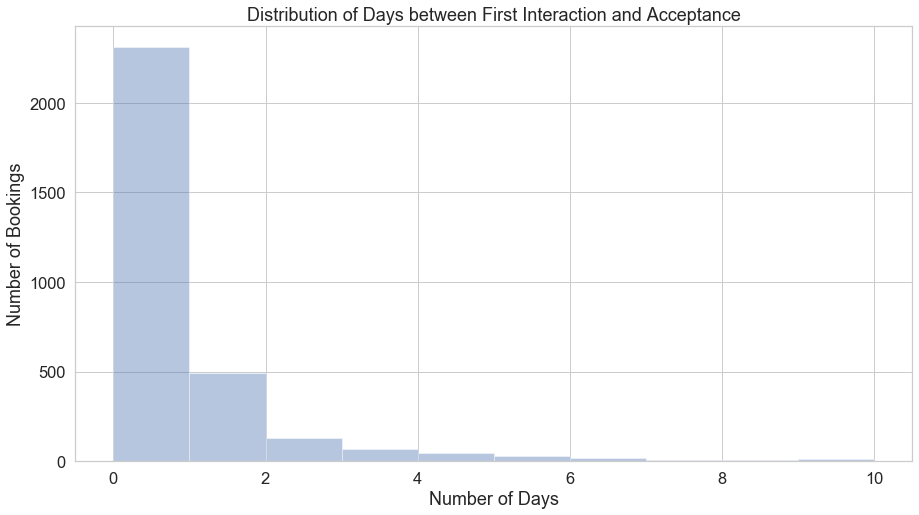

In [53]:
fig, ax = plt.subplots(1, 1, figsize=(15, 8))
sns.distplot(df_c_f_dur['days'], bins=range(0, 11), kde=False)
ax.set_title('Distribution of Days between First Interaction and Acceptance')
ax.set_xlabel('Number of Days')
ax.set_ylabel('Number of Bookings')
;

In [54]:
t_dur = df_c_f_dur.loc[df_c_f_dur['ab']=='treatment', 'days']
c_dur = df_c_f_dur.loc[df_c_f_dur['ab']=='control', 'days']

''

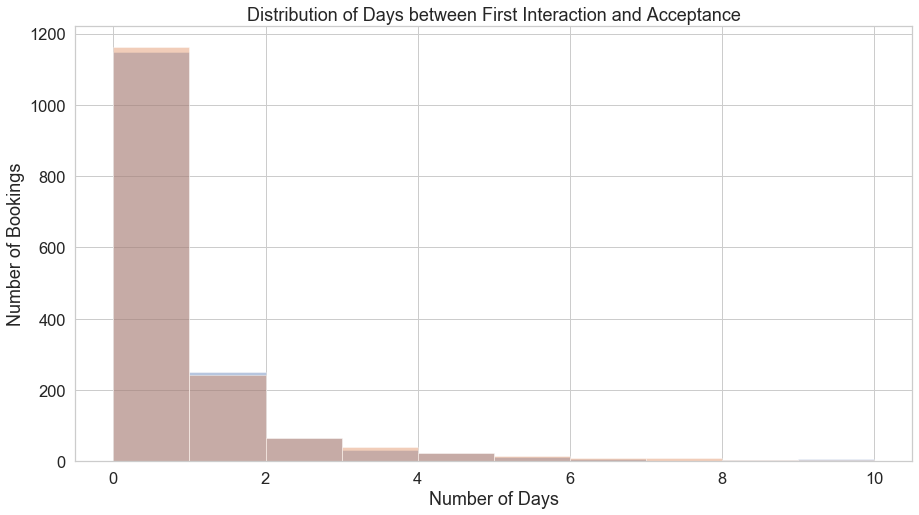

In [55]:
fig, ax = plt.subplots(1, 1, figsize=(15, 8))
sns.distplot(t_dur, bins=range(0, 11), kde=False)
sns.distplot(c_dur, bins=range(0, 11), kde=False)
ax.set_title('Distribution of Days between First Interaction and Acceptance')
ax.set_xlabel('Number of Days')
ax.set_ylabel('Number of Bookings')
;

''

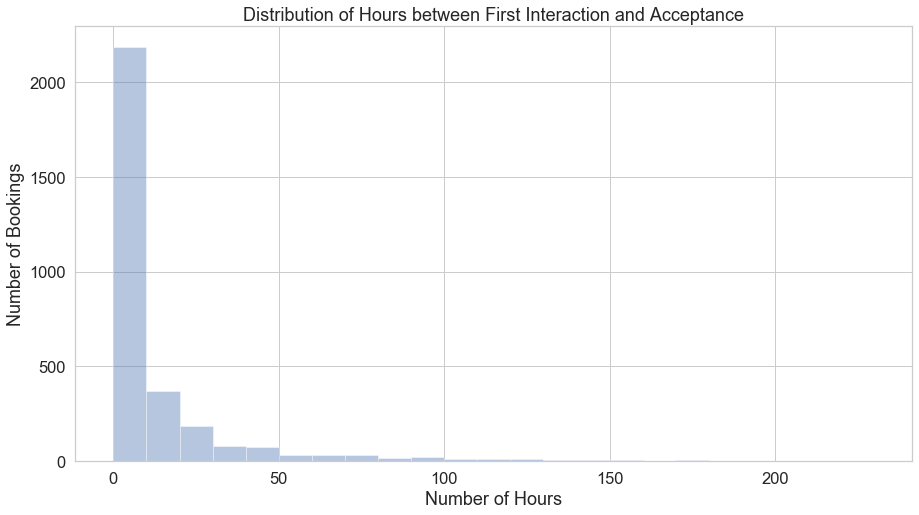

In [56]:
fig, ax = plt.subplots(1, 1, figsize=(15, 8))
sns.distplot(df_c_f_dur['hours'], bins=range(0, 240, 10), kde=False)
ax.set_title('Distribution of Hours between First Interaction and Acceptance')
ax.set_xlabel('Number of Hours')
ax.set_ylabel('Number of Bookings')
;

In [75]:
t_dur_ = df_c_f_dur.loc[df_c_f_dur['ab']=='treatment', 'hours']
c_dur_ = df_c_f_dur.loc[df_c_f_dur['ab']=='control', 'hours']

''

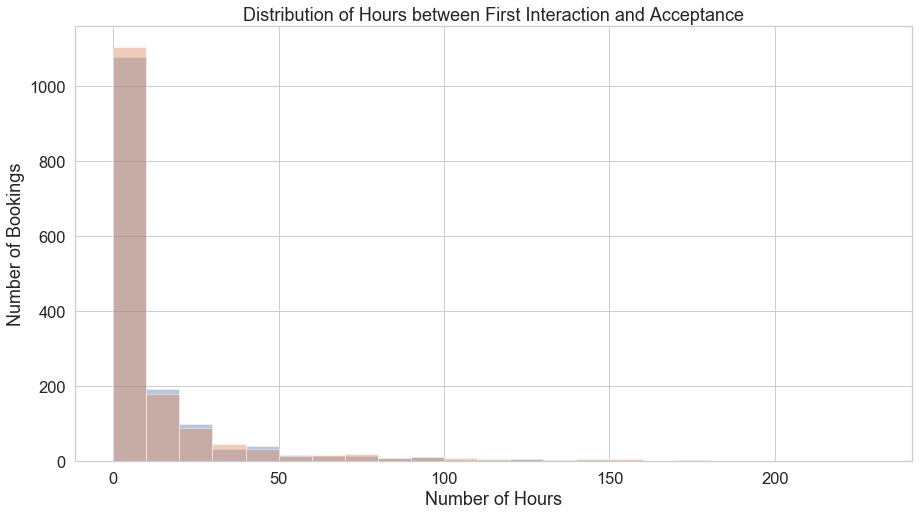

In [58]:
fig, ax = plt.subplots(1, 1, figsize=(15, 8))
sns.distplot(t_dur_, bins=range(0, 240, 10), kde=False)
sns.distplot(c_dur_, bins=range(0, 240, 10), kde=False)
ax.set_title('Distribution of Hours between First Interaction and Acceptance')
ax.set_xlabel('Number of Hours')
ax.set_ylabel('Number of Bookings')
;

''

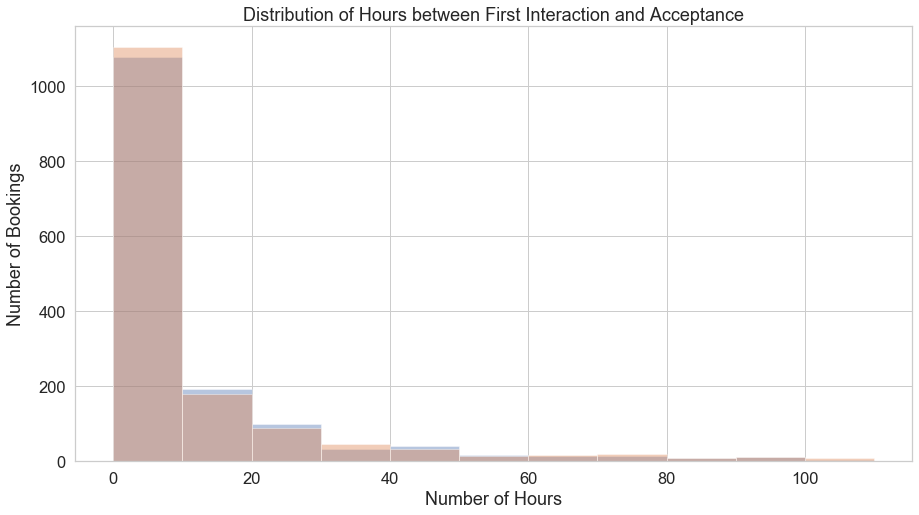

In [59]:
fig, ax = plt.subplots(1, 1, figsize=(15, 8))
sns.distplot(t_dur_, bins=range(0, 120, 10), kde=False)
sns.distplot(c_dur_, bins=range(0, 120, 10), kde=False)
ax.set_title('Distribution of Hours between First Interaction and Acceptance')
ax.set_xlabel('Number of Hours')
ax.set_ylabel('Number of Bookings')
;

The distributions of days interval of the two groups are about the same.

### 2.5 T-test on the days interval between first interaction and acceptance

In [73]:
from scipy import stats
t_score = stats.ttest_ind(c_dur,t_dur)
print('T-score is {}'.format(t_score[0]))

T-score is 1.6617352099545128


In [76]:
t_score = stats.ttest_ind(c_dur_,t_dur_)
print('T-score is {}'.format(t_score[0]))

T-score is 1.6528387547256516


The difference between the durations of each group are insignificant.

### 2.6 Compare duration by booking channel

In [62]:
channel_dur = df_c_f_dur.pivot_table(index=['ab','dim_contact_channel'], values=['days','hours'],
                                     aggfunc=['min', 'max', 'mean', 'median', 'std'])
channel_dur

min          max               mean             \
                              days hours   days    hours      days      hours   
ab        dim_contact_channel                                                   
control   book_it              0.0   0.0  104.0   2492.0  0.488327  12.727626   
          contact_me           0.0   0.0  671.0  16102.0  1.983947  48.930123   
          instant_booked       0.0   0.0    0.0      0.0  0.000000   0.000000   
treatment book_it              0.0   0.0   12.0    283.0  0.295775   8.265594   
          contact_me           0.0   0.0   69.0   1665.0  0.906910  23.166987   
          instant_booked       0.0   0.0    0.0      0.0  0.000000   0.000000   

                              median              std              
                                days hours       days       hours  
ab        dim_contact_channel                                      
control   book_it                0.0   2.0   4.637845  110.960944  
          contact_me             0.0   4.0  22.085175  529.827518  
          instant_booked         0.0   0.0   0.000000    0.000000  
treatment book_it                0.0   2.0   0.943485   21.796203  
          contact_me             0.0   4.0   3.508186   84.082452  
          instant_booked         0.0   0.0   0.000000    0.000000

In [63]:
channels = df_c_f['dim_contact_channel'].unique()

In [64]:
for c in channels:
    c_dur_ = df_c_f_dur.loc[(df_c_f_dur['ab']=='control')&(df_c_f_dur['dim_contact_channel']==c),'days']
    t_dur_ = df_c_f_dur.loc[(df_c_f_dur['ab']=='treatment')&(df_c_f_dur['dim_contact_channel']==c),'days']
    t_score_ = stats.ttest_ind(c_dur_,t_dur_)
    print('T-score is {}'.format(t_score_[0]))

T-score is 1.5550228853086603
T-score is 0.9075778763680811
T-score is nan


C:\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
C:\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
C:\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1912: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


In [65]:
for c in channels:
    c_dur_ = df_c_f_dur.loc[(df_c_f_dur['ab']=='control')&(df_c_f_dur['dim_contact_channel']==c),'hours']
    t_dur_ = df_c_f_dur.loc[(df_c_f_dur['ab']=='treatment')&(df_c_f_dur['dim_contact_channel']==c),'hours']
    t_score_ = stats.ttest_ind(c_dur_,t_dur_)
    print('T-score is {}'.format(t_score_[0]))

T-score is 1.550533059197084
T-score is 0.8801974977104148
T-score is nan


Similarly, the difference between the durations of each group separated by channels are insignificant.

## 3. Exploration

### 3.1 Remove the users in treatment group whose message is below 140 characters

In [79]:
df_c_f.loc[~((df_c_f['ab']=='treatment')&
           (df_c_f['m_first_message_length']<140))].pivot_table(index='ab', values=date_cols, aggfunc='count')

,ts_accepted_at_first,ts_booking_at,ts_interaction_first,ts_reply_at_first
ab,,,,
control,1595,1039,4550,3906
treatment,1315,864,3883,3362


In [80]:
z_test(1315, 1595, 3883, 4550)

-1.1451596438311609

The z score shows that the treatment group is not significantly different.

### 3.2 The duration between first inquiry and reply

In [86]:
df_c_f_rep = df_c_f.loc[df_c_f['ts_reply_at_first'].notnull()]

# Calculate time spent from acceptance to first interaction
df_c_f_rep['duration'] = (df_c_f_rep['ts_reply_at_first'] - df_c_f_rep['ts_interaction_first'])

# Calculate the number of days from acceptance to first interaction
df_c_f_rep['hours'] = round((df_c_f_rep['duration'].dt.total_seconds() / 3600))
df_c_f_rep['hours'] = df_c_f_rep['hours'].apply(lambda x: 0.0 if x == -0.0 else x)

df_c_f_rep['days'] = round(df_c_f_rep['hours'] / 24)
df_c_f_rep['days'] = df_c_f_rep['days'].apply(lambda x: 0.0 if x == -0.0 else x)

C:\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
C:\anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.p

In [87]:
df_c_f_rep.head()

,id_user,ab,id_guest,id_host,id_listing,ts_interaction_first,ts_reply_at_first,ts_accepted_at_first,ts_booking_at,dim_contact_channel,m_first_message_length,duration,hours,days
0,f966752c-8533-48b2-af6f-8c6797d2b247,treatment,f966752c-8533-48b2-af6f-8c6797d2b247,4405ab66-1c68-449b-abd9-1ad1892a6c4d,fe07e0c4-c317-44bc-a82d-5b599a248049,2013-01-01 23:04:35,2013-01-03 23:15:23,NaT,NaT,contact_me,230.0,2 days 00:10:48,48.0,2.0
1,873f93fb-234c-4cfb-83c7-27ff0e582a8e,treatment,873f93fb-234c-4cfb-83c7-27ff0e582a8e,aa41b57b-e29f-4c95-bf27-48f27519e419,d47717da-315a-42c2-8888-9b7d4bea8829,2013-01-02 00:21:26,2013-01-07 23:38:31,NaT,NaT,contact_me,98.0,5 days 23:17:05,143.0,6.0
2,7308791e-04c3-416a-be2d-4188816decc2,control,7308791e-04c3-416a-be2d-4188816decc2,8b118ba1-b439-493e-88c7-2c89a81cec1b,ac231804-951c-4fcb-a0e6-1a4aecbfb6ce,2013-01-02 02:30:19,2013-01-02 18:06:10,2013-01-02 18:06:10,NaT,contact_me,278.0,0 days 15:35:51,16.0,1.0
3,097c48a4-f4b6-4870-bf29-370e33de868e,control,097c48a4-f4b6-4870-bf29-370e33de868e,140b0847-549d-4c77-bb8c-7cea16914871,727357bd-8031-4e59-b812-22cfa617e031,2013-01-02 03:24:06,2013-01-02 17:49:08,NaT,NaT,contact_me,785.0,0 days 14:25:02,14.0,1.0
4,ff3d6a6a-7748-41f8-8a3f-fdc26ca21650,control,ff3d6a6a-7748-41f8-8a3f-fdc26ca21650,82bc1dd7-e146-4c03-93ef-1edd143e4612,aed82e29-205e-4827-a7ac-c5963c8a6895,2013-01-02 13:29:21,2013-01-22 20:19:54,NaT,NaT,contact_me,623.0,20 days 06:50:33,487.0,20.0


In [89]:
t_rep = df_c_f_rep.loc[df_c_f_rep['ab']=='treatment', 'days']
c_rep = df_c_f_rep.loc[df_c_f_rep['ab']=='control', 'days']

In [106]:
t_score = stats.ttest_ind(c_rep,t_rep)
print('T-score is {}'.format(t_score[0]))

T-score is -0.1912345741068278


''

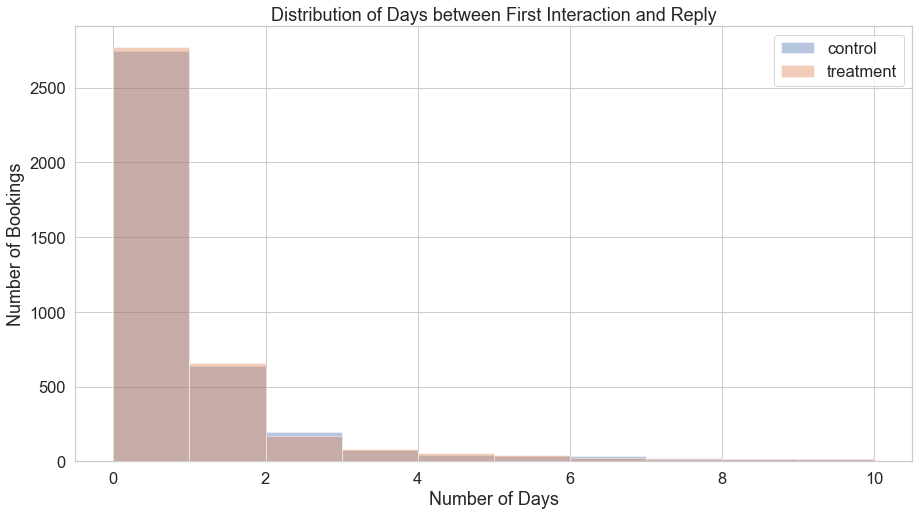

In [148]:
fig, ax = plt.subplots(1, 1, figsize=(15, 8))
sns.distplot(c_rep, bins=range(0, 11), kde=False, label='control')
sns.distplot(t_rep, bins=range(0, 11), kde=False, label='treatment')
ax.set_title('Distribution of Days between First Interaction and Reply')
ax.set_xlabel('Number of Days')
ax.set_ylabel('Number of Bookings')
ax.legend()
;

In [149]:
t_rep_ = df_c_f_rep.loc[df_c_f_rep['ab']=='treatment', 'hours']
c_rep_ = df_c_f_rep.loc[df_c_f_rep['ab']=='control', 'hours']

In [150]:
t_score = stats.ttest_ind(c_rep_,t_rep_)
print('T-score is {}'.format(t_score[0]))

T-score is -0.18960846489481803


''

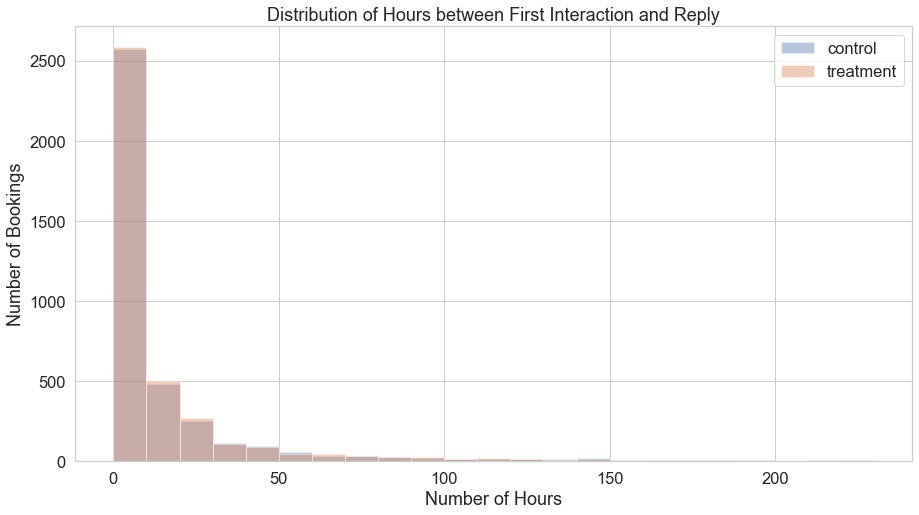

In [154]:
fig, ax = plt.subplots(1, 1, figsize=(15, 8))
sns.distplot(c_rep_, bins=range(0, 240, 10), kde=False, label='control')
sns.distplot(t_rep_, bins=range(0, 240, 10), kde=False, label='treatment')
ax.set_title('Distribution of Hours between First Interaction and Reply')
ax.set_xlabel('Number of Hours')
ax.set_ylabel('Number of Bookings')
ax.legend()
;

In [99]:
df_c_f_rep['accept'] = df_c_f_rep['ts_accepted_at_first'].fillna(0).apply(lambda x: 1 if x != 0 else x)

C:\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [104]:
df_c_f_rep.pivot_table(index='accept', values=['days','hours'], aggfunc=['min', 'max', 'mean', 'median', 'std'])

min          max               mean            median        \
       days hours   days    hours      days      hours   days hours   
accept                                                                
0       0.0   0.0  584.0  14027.0  3.015362  73.557926    0.0   7.0   
1       0.0   0.0  104.0   2491.0  0.309131   8.762524    0.0   1.0   

              std              
             days       hours  
accept                         
0       22.628610  543.091749  
1        2.282158   54.293651

In [105]:
r_rep = df_c_f_rep.loc[df_c_f_rep['accept']==0, 'hours']
a_rep = df_c_f_rep.loc[df_c_f_rep['accept']==1, 'hours']

In [108]:
t_score = stats.ttest_ind(r_rep,a_rep)
print('T-score is {}'.format(t_score[0]))

T-score is 6.677861497687482


In [111]:
df_c_f_rep.loc[df_c_f_rep['days']<10].pivot_table(index='accept',
                                                  values=['days','hours'],
                                                  aggfunc=['min', 'max', 'mean', 'median', 'std'])

min        max             mean            median             std  \
       days hours days  hours      days      hours   days hours      days   
accept                                                                      
0       0.0   0.0  9.0  227.0  0.792645  20.259194    0.0   6.0  1.512480   
1       0.0   0.0  9.0  209.0  0.228372   6.833015    0.0   1.0  0.720596   

                   
            hours  
accept             
0       35.193016  
1       16.302612

In [112]:
r_rep_ = df_c_f_rep.loc[df_c_f_rep['days']<10].loc[df_c_f_rep['accept']==0, 'hours']
a_rep_ = df_c_f_rep.loc[df_c_f_rep['days']<10].loc[df_c_f_rep['accept']==1, 'hours']

In [113]:
t_score = stats.ttest_ind(r_rep_, a_rep_)
print('T-score is {}'.format(t_score[0]))

T-score is 19.951913377875186


### 3.3 Number of times a listing is inquired

In [114]:
df_c_f

,id_user,ab,id_guest,id_host,id_listing,ts_interaction_first,ts_reply_at_first,ts_accepted_at_first,ts_booking_at,dim_contact_channel,m_first_message_length
0,f966752c-8533-48b2-af6f-8c6797d2b247,treatment,f966752c-8533-48b2-af6f-8c6797d2b247,4405ab66-1c68-449b-abd9-1ad1892a6c4d,fe07e0c4-c317-44bc-a82d-5b599a248049,2013-01-01 23:04:35,2013-01-03 23:15:23,NaT,NaT,contact_me,230.0
1,873f93fb-234c-4cfb-83c7-27ff0e582a8e,treatment,873f93fb-234c-4cfb-83c7-27ff0e582a8e,aa41b57b-e29f-4c95-bf27-48f27519e419,d47717da-315a-42c2-8888-9b7d4bea8829,2013-01-02 00:21:26,2013-01-07 23:38:31,NaT,NaT,contact_me,98.0
2,7308791e-04c3-416a-be2d-4188816decc2,control,7308791e-04c3-416a-be2d-4188816decc2,8b118ba1-b439-493e-88c7-2c89a81cec1b,ac231804-951c-4fcb-a0e6-1a4aecbfb6ce,2013-01-02 02:30:19,2013-01-02 18:06:10,2013-01-02 18:06:10,NaT,contact_me,278.0
3,097c48a4-f4b6-4870-bf29-370e33de868e,control,097c48a4-f4b6-4870-bf29-370e33de868e,140b0847-549d-4c77-bb8c-7cea16914871,727357bd-8031-4e59-b812-22cfa617e031,2013-01-02 03:24:06,2013-01-02 17:49:08,NaT,NaT,contact_me,785.0
4,ff3d6a6a-7748-41f8-8a3f-fdc26ca21650,control,ff3d6a6a-7748-41f8-8a3f-fdc26ca21650,82bc1dd7-e146-4c03-93ef-1edd143e4612,aed82e29-205e-4827-a7ac-c5963c8a6895,2013-01-02 13:29:21,2013-01-22 20:19:54,NaT,NaT,contact_me,623.0
...,...,...,...,...,...,...,...,...,...,...,...
9099,6a72582e-c0c4-4f37-a824-186bde0b3d47,treatment,6a72582e-c0c4-4f37-a824-186bde0b3d47,7af1bb56-a2aa-4c2e-8793-be2d4b736599,82c15b61-f426-4d1a-a413-14f36d6a9b07,2013-06-06 05:57:33,2013-06-06 06:06:37,NaT,NaT,contact_me,227.0
9100,d838c86d-fdbf-4a36-a57c-2d518c60ce92,treatment,d838c86d-fdbf-4a36-a57c-2d518c60ce92,5059ad3c-c378-4875-b558-0d20ea30bebc,26b9a8e8-7010-4694-85d7-b6af24346040,2013-06-06 13:00:25,2013-06-07 21:43:02,NaT,NaT,contact_me,195.0
9101,15da69de-49dd-4ba8-97d6-0919fdaf3834,control,15da69de-49dd-4ba8-97d6-0919fdaf3834,ec1a2c76-adfb-4f2c-9f1d-1688a6a1bfeb,c6fe66cf-d0be-48c0-80d0-0f6422eb676a,2013-06-06 13:57:41,NaT,NaT,NaT,contact_me,481.0
9102,e6c5dd5d-5fef-4b16-a7e6-37fa8cee3b43,control,e6c5dd5d-5fef-4b16-a7e6-37fa8cee3b43,dbf6e36b-b34c-4cee-853f-2abea68bf958,0b3b6077-3748-4538-8812-da021dd4c83b,2013-06-06 15:28:21,NaT,NaT,NaT,contact_me,271.0


In [117]:
listing_req = df_c_f.pivot_table(index='id_listing', values='id_user', aggfunc='count')

''

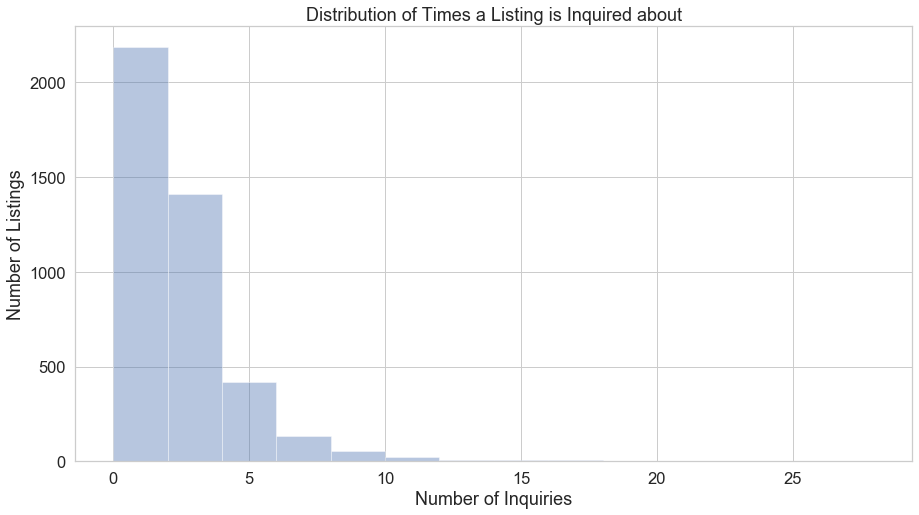

In [136]:
fig, ax = plt.subplots(1, 1, figsize=(15, 8))
sns.distplot(listing_req['id_user'], bins=range(0, 30, 2), kde=False)
ax.set_title('Distribution of Times a Listing is Inquired about')
ax.set_xlabel('Number of Inquiries')
ax.set_ylabel('Number of Listings')
;